This notebook is for the generation of figures for the Ec-Bs co-culture.

This next code chunk cleans up the dataframe into one dataframe where each sample is subsampled to 100 events. It normalizes the 16S amplicon by 16S copy number for that strain and then converts to relative abundance.

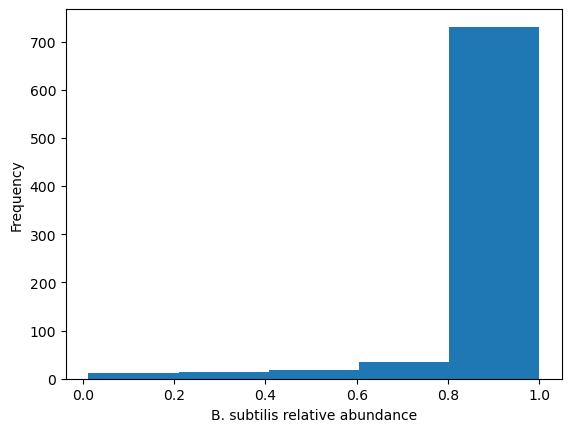

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ecbs/ecbs.shared', delimiter = '\t')

df['Sum'] = df['Bacillus_subtilis']+df['Escherichia_coli']

threshold = 1000 #there are some droplets which had contamination and don't have too many Ec and Bs amplicons
df = df[df['Sum'] > threshold]

#normalize by copy number and turn to relative abundance
df['Bacillus_subtilis'] = df['Bacillus_subtilis']/10
df['Escherichia_coli'] = df['Escherichia_coli']/7

df['Total'] = df[['Bacillus_subtilis','Escherichia_coli']].sum(axis=1)

df['Bacillus_subtilis'] = df['Bacillus_subtilis']/df['Total']
df['Escherichia_coli'] = df['Escherichia_coli']/df['Total']

df = df.drop('Total',axis=1)

#print(df[['Bacillus_subtilis','Escherichia_coli']])

plt.hist(df['Bacillus_subtilis'], bins = 5, log=False)
plt.xlabel('B. subtilis relative abundance')
plt.ylabel('Frequency')

df['Bacillus_subtilis'].to_csv('seq_Bs_relabund.tsv', sep="\t",index=False) 
               